In [1]:
import numpy as np
import pandas as pd

from predict import read_all_synthetic_curves

In [7]:
curves = read_all_synthetic_curves('..\..\data')

test_curve = curves['1']
train_curves = pd.concat([curves[k] for k in ['2', '3']])



In [26]:
train_curves.dropna(inplace=True)
test_curve.dropna(inplace=True)

In [15]:
features = ['DTC', 'depth','RHOB', 'x', 'y']
target = ['DTS']

In [19]:
from sklearn.model_selection import train_test_split

X = train_curves[features]
y = train_curves[target]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(n_estimators=10000, max_depth=100).fit(X, y)
reg.score(X_test, y_test)
y_test_pred = reg.predict(X_test)

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


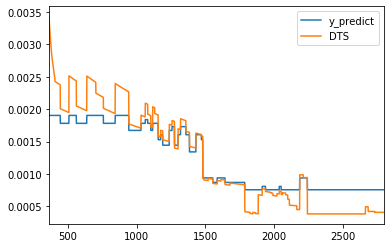

In [61]:
y_test_pred = reg.predict(test_curve[features])
test_curve['y_predict'] = y_test_pred
#test_curve.head()
test_curve[['y_predict', 'DTS']].plot()

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


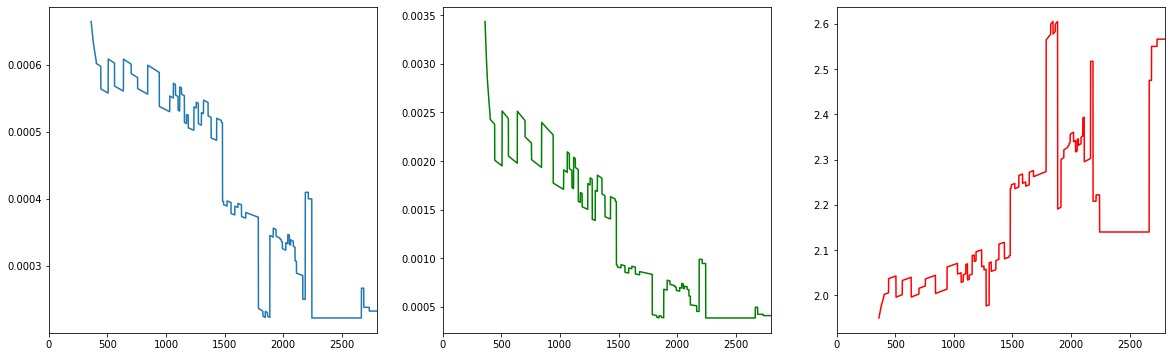

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

curves['1'].DTC.plot(ax=ax1)
curves['1'].DTS.plot(ax=ax2, color='green')
curves['1'].RHOB.plot(ax=ax3, color='red')
fig.show()

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


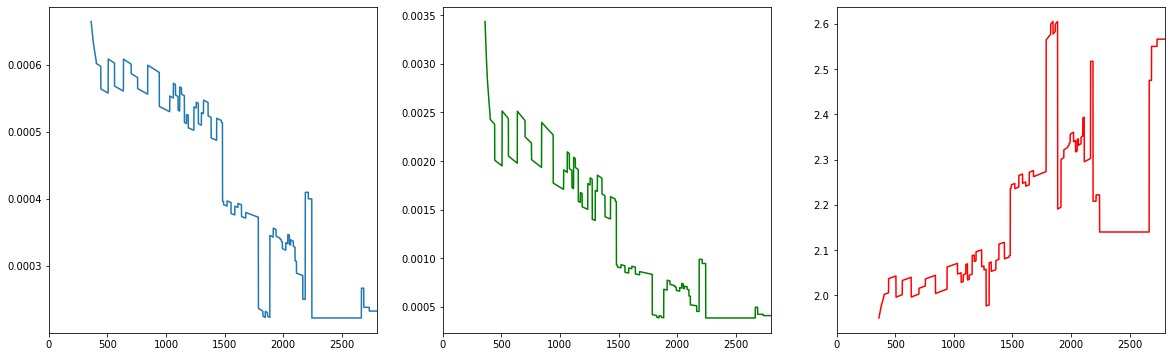

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

curves['2'].DTC.plot(ax=ax1)
curves['2'].DTS.plot(ax=ax2, color='green')
curves['2'].RHOB.plot(ax=ax3, color='red')
fig.show()

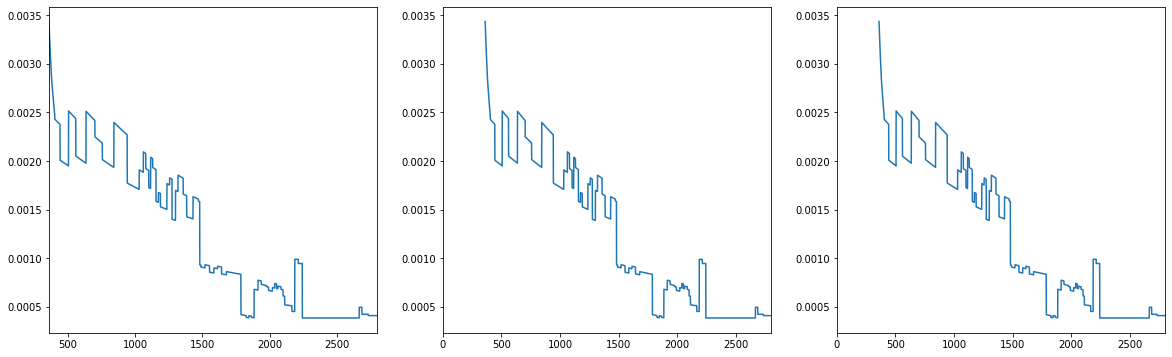

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
curves['1'].DTS.plot(ax=ax1)
curves['2'].DTS.plot(ax=ax2)
curves['3'].DTS.plot(ax=ax3)

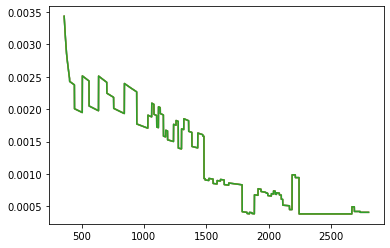

In [55]:
plt.plot(curves['1'].DTS)
plt.plot(curves['2'].DTS)
plt.plot(curves['3'].DTS)

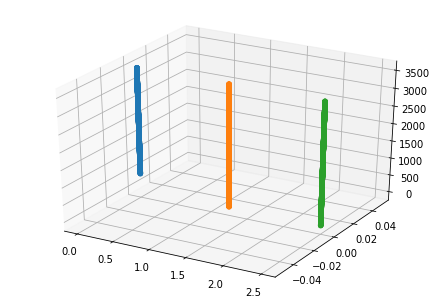

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(curves['1'].x, curves['1'].y, curves['1'].depth)
ax.scatter(curves['2'].x, curves['2'].y, curves['2'].depth)
ax.scatter(curves['3'].x, curves['3'].y, curves['3'].depth)